<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [40]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# 1. Boxplot for "Median value of owner occupied homes" (MEDV)

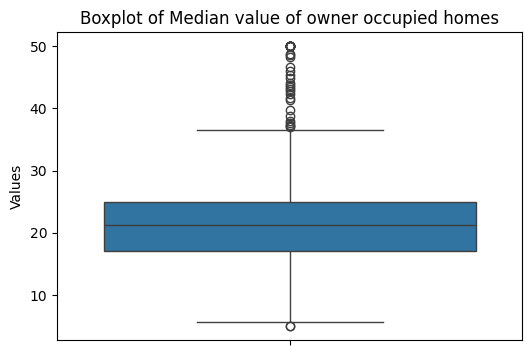

In [8]:
pyplot.figure(figsize=(6, 4))
sns.boxplot(y=boston_df['MEDV'])

# Set the title and labels
pyplot.title('Boxplot of Median value of owner occupied homes')
pyplot.ylabel('Values')

# Show the plot
pyplot.show()

# 2. Bar plot for the Charles river variable (CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise))

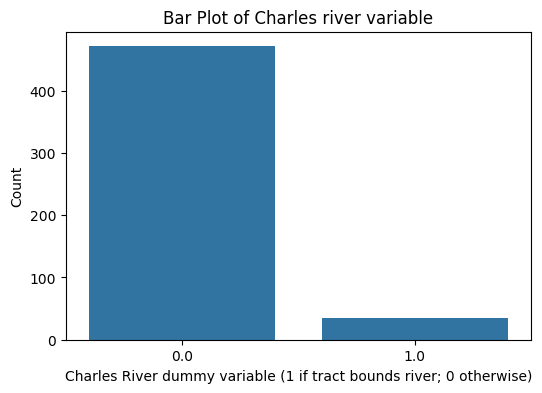

In [9]:
# Count the occurrences of each value (0 and 1)
count_data = boston_df['CHAS'].value_counts()

# Create a bar plot
pyplot.figure(figsize=(6, 4))
sns.barplot(x=count_data.index, y=count_data.values)

# Set the title and labels
pyplot.title('Bar Plot of Charles river variable')
pyplot.xlabel('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
pyplot.ylabel('Count')

# Show the plot
pyplot.show()

# 3. Boxplot for the MEDV variable vs the AGE variable (proportion of owner-occupied units built prior to 1940)

## Descretize the AGE variable in 3 groups of 35 years and younger, between 35 and 70 and 70 years and older 

In [10]:
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_group'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'AGE_group'] = '70 years and older'

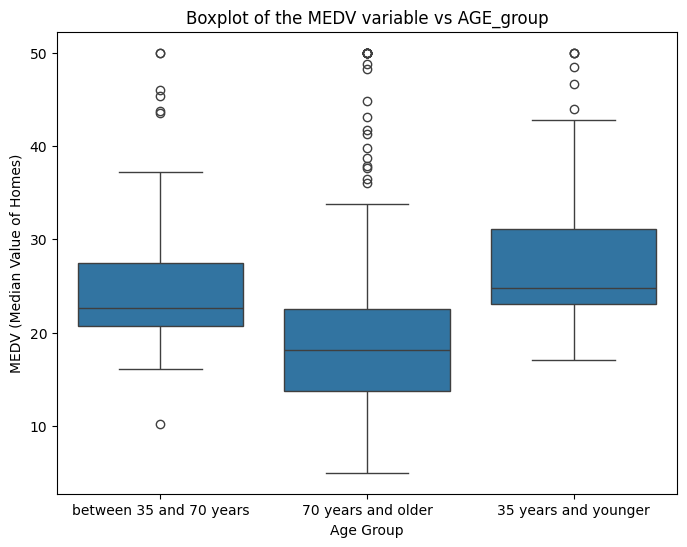

In [11]:
pyplot.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)

# Set the title and labels
pyplot.title('Boxplot of the MEDV variable vs AGE_group')
pyplot.xlabel('Age Group')
pyplot.ylabel('MEDV (Median Value of Homes)')

# Show the plot
pyplot.show()

# 4. Scatterplot of NOX (nitric oxides concentration (parts per 10 million)) and INDUS (proportion of non-retail business acres per town)

## State the hypothesis:
### H_0 = NOX (nitric oxides concentration (parts per 10 million)) is not correlated with INDUS (proportion of non-retail business acres per town)
### H_1 = NOX (nitric oxides concentration (parts per 10 million) is correlated with INDUS (proportion of non-retail business acres per town)

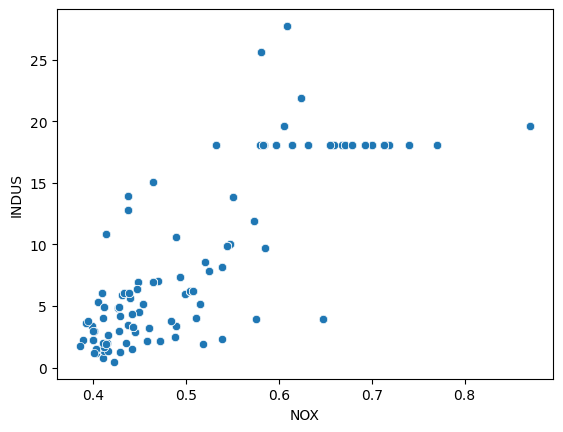

In [12]:
ax= sns.scatterplot(x='NOX', y='INDUS', data= boston_df)

# 5. Histogram for PTRATIO (pupil-teacher ratio by town) variable 

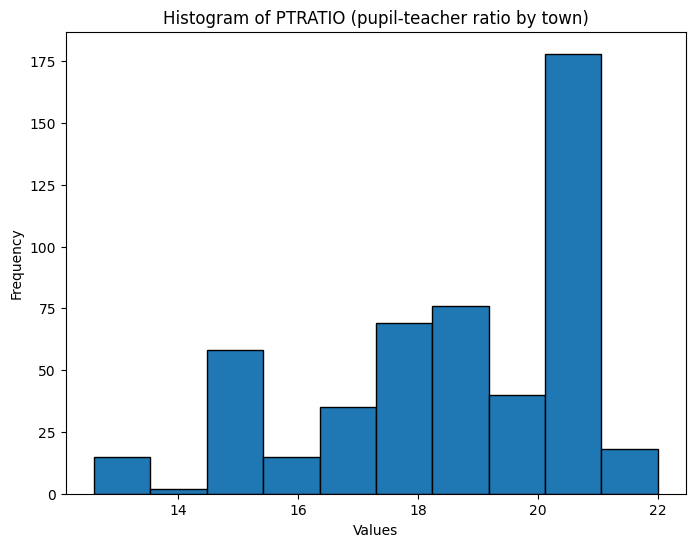

In [13]:
pyplot.figure(figsize=(8, 6))
pyplot.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')

# Set the title and labels
pyplot.title('Histogram of PTRATIO (pupil-teacher ratio by town)')
pyplot.xlabel('Values')
pyplot.ylabel('Frequency')

# Show the plot
pyplot.show()

# 1) Is there a significant difference in median value of houses bounded by the river Charles or not (T-Test for independent samples)

## State of hypothesis:
### H_0 = There is no difference in median value of houses bounded by the river Charles or not 
### H_1 = There is a difference in median value of houses bounded by the river Charles or not 

In [14]:
alpha = 0.05

In [30]:
# we use the Levene's Test in Python to check test significance 

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center= 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [ ]:
# the assumption of equality of variances is not met since p-value is smaller than 0.05 but we will continue with the T-Test

In [41]:
# T-Test for independent samples 

t_stat, p_value = scipy.stats.ttest_ind(
    boston_df[boston_df['CHAS'] == 1]['MEDV'],  # Group where CHAS == 1
    boston_df[boston_df['CHAS'] == 0]['MEDV'],  # Group where CHAS == 0
    equal_var=True  # Assuming equal variance
)

print(t_stat, p_value)

3.996437466090509 7.390623170519905e-05


In [ ]:
# Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the river Charles or not.

# 2) Is there a difference in median values of houses (MEDV) for each proportion of owner occupied units build prior to 1940 (AGE_group)? (ANOVA)

## State the hypothesis:
### H_0 = There is no difference in MEDV for owner occupied units build prior to 1940.
### H_1 = There is a difference in MEDV for owner occupied units build prior to 1940. 

In [32]:
boston_df.loc[boston_df['AGE'] > 84, 'AGE_group'] = 1 # 'prior to 1940'
boston_df.loc[boston_df['AGE'] <= 84, 'AGE_group'] = 0 # 'after 1940'

print(boston_df['AGE_group'].value_counts())

AGE_group
0    289
1    217
Name: count, dtype: int64


In [33]:
# Test for the equality of variance: 

scipy.stats.levene(boston_df[boston_df['AGE_group'] == 1]['MEDV'],
                   boston_df[boston_df['AGE_group'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=1.4055510245413045, pvalue=0.2363550102480432)

In [ ]:
# Since the p-value is > 0.05, the variances are equal and assumption is met. 

In [34]:
# First, separate the two samples into a variable each

prior_1940= boston_df[boston_df['AGE_group'] == 1]['MEDV']
after_1940= boston_df[boston_df['AGE_group'] == 0]['MEDV']


In [35]:
# One_way ANOVA

f_statistic, p_value = scipy.stats.f_oneway(
    prior_1940,
    after_1940,
)
print (f_statistic, p_value)

70.89786758512082 3.9330184294042697e-16


In [ ]:
# Conclusion: Since the p_value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ. 

# 3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

## State the hypothesis:
### H_0 = NOX (nitric oxides concentration (parts per 10 million)) is not correlated with INDUS (proportion of non-retail business acres per town)
### H_1 = NOX (nitric oxides concentration (parts per 10 million) is correlated with INDUS (proportion of non-retail business acres per town)¶

In [36]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [ ]:
# Conclusion: Since the p_value < 0.05, we reject the null hypothesis and conclude that there exists a significant relationship between NOX (nitric oxides concentration (parts per 10 million) and INDUS (proportion of non-retail business acres per town).¶¶ 

# 4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

## H_0: There is no impact of additional weighted distance to the the five Boston employment centres on the median value of owner occupied homes.
## H_1: There is an impact of additional weighted distance to the the five Boston employment centres on the median value of owner occupied homes.

In [37]:
x= boston_df['DIS']
y= boston_df['MEDV']
x=sm.add_constant(x)

model=sm.OLS(y,x).fit()
predictions= model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        20:19:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Conclusion: p_value < 0.05 there is evidence of a significant impact of additional weighted distance to the the five Boston employment centres on the median value of owner occupied homes.
# A coefficient of 1.0916 means that for each unit increase in distance from the employment centers, the median value of homes increases by 1.0916 units.